In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# generate two class dataset
data = pd.read_csv("stroke 21 variables for ML.csv")
data.head()

,stroke,NP,NC,MP,MC,BasoP,BasoC,EosP,EosC,MPV,...,RBC,RDW-DV,MCV,Glc,PLT,PDW,PCT,Hgb,Sex,Age
0,1,85.40,7.95,4.7,0.44,0.2,2,1.2,0.11,10.0,...,2.71,15.0,81.5,11.91,177,16.2,0.177,73,0,64
1,1,66.60,5.10,5.4,0.41,0.2,2,0.8,0.06,8.7,...,4.98,12.7,89.4,6.93,241,16.0,0.210,153,1,47
2,1,61.70,4.72,6.6,0.51,0.2,2,4.4,0.34,8.4,...,4.62,12.5,92.0,9.43,227,15.0,0.192,139,1,44
3,1,83.34,10.69,2.9,0.37,0.2,2,0.2,0.02,9.3,...,5.06,12.4,88.5,7.98,296,11.3,0.270,138,0,60
4,1,58.50,3.93,5.3,0.36,0.3,2,0.4,0.03,8.7,...,3.70,12.8,91.0,5.67,193,15.3,0.168,107,0,65


In [52]:
# Split target and features
X = data.drop(['stroke'],axis=1)
X
y = data['stroke']
y = y.astype(int)
y
print(X.shape)
print(y.shape)

(10476, 23)
(10476,)


In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
X_features = X
sc = StandardScaler()
X = sc.fit_transform(X)

In [54]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=5)

# second one

#X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=5)

print(X_train.shape)
print(X_test.shape)
#print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
#print(y_valid.shape)

(8380, 23)
(2096, 23)
(8380,)
(2096,)


In [55]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB



# logistic regression
model1 = LogisticRegression(C=1.01)
# knn
model2 = KNeighborsClassifier(n_neighbors=51)
# RF
model3 = RandomForestClassifier(random_state=25,criterion='entropy',n_estimators=186)

# XGBoost
model4 = XGBClassifier(learning_rate=0.01, n_estimators=1000, silent=0, gamma=0.2, subsample=0.75, 
                       objective='binary:logistic', reg_alpha=1, reg_lambda=1,seed=27,
                      max_depth=7, min_child_weight=3)

## elastic net
##model5 = ElasticNet(alpha=0.001, l1_ratio=0.1)

# neural network
model6 = MLPClassifier(alpha=0.1, hidden_layer_sizes=13)

# GaussianNB
model7=GaussianNB() ##因为唯一参数 var_smoothing设置为非默认值时， evaluation metrics的值很不理想

## 所以此处直接就是 by default 来设置

In [41]:
# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
## model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
## pred_prob5 = model5.predict(X_test)
pred_prob6 = model6.predict_proba(X_test)
pred_prob7 = model7.predict_proba(X_test)

C:\Users\93513\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[10:23:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\93513\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
## pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)
pred7 = model7.predict(X_test)

In [22]:
print(pred1)
print(pred2)
print(pred3)

[1 1 1 ... 1 0 0]
[1 0 1 ... 1 0 0]
[1 1 1 ... 1 0 0]


In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, roc_curve

In [29]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
## fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# pos_label : 整数或者字符串, 默认None，表示被认为是正类样本的类别, 可以不填，因为运行三五十个点后就可以看到ROC曲线了

In [30]:
# AUC score can be computed using the roc_auc_score() method of sklearn:


### 因为 elastic net的很多evaluation metrics 不能显示，所以接下来注掉 model5

from sklearn.metrics import roc_auc_score

In [31]:
# 1 - auc scores  training set

pred1train = model1.predict(X_train)
pred2train = model2.predict(X_train)
pred3train = model3.predict(X_train)
pred4train = model4.predict(X_train)
## pred5train = model5.predict(X_train)
pred6train = model6.predict(X_train)
pred7train = model7.predict(X_train)


# predict probabilities
pred_prob1train = model1.predict_proba(X_train)
pred_prob2train = model2.predict_proba(X_train)
pred_prob3train = model3.predict_proba(X_train)
pred_prob4train = model4.predict_proba(X_train)
## pred_prob5train = model5.predict(X_train)
pred_prob6train = model6.predict_proba(X_train)
pred_prob7train = model7.predict_proba(X_train)

auc_score1train = roc_auc_score(y_train, pred_prob1train[:,1])
auc_score2train = roc_auc_score(y_train, pred_prob2train[:,1])
auc_score3train = roc_auc_score(y_train, pred_prob3train[:,1])
auc_score4train = roc_auc_score(y_train, pred_prob4train[:,1])
## auc_score5train = roc_auc_score(y_train, pred_prob5)
auc_score6train = roc_auc_score(y_train, pred_prob6train[:,1])
auc_score7train = roc_auc_score(y_train, pred_prob7train[:,1])



print(auc_score1train, auc_score2train, auc_score3train, auc_score4train,auc_score6train,auc_score7train)

0.8865951299682886 0.9030682840538763 1.0 0.985784029310592 0.9252451823331153 0.8475239766464071


In [56]:
# def bootstrap_auc(model1, X_train, y_train, X_test, y_test, nsamples=1000):
#     auc_values1 = []
#     for b in range(nsamples):
#         idx1 = np.random.randint(X_train.shape[0], size=X_train.shape[0])
#         model1.fit(X_train[idx1], y_train[idx1])
#         pred1_ = model1.predict_proba(X_test)[:, 1]
#         roc_auc1 = roc_auc_score(y_test.ravel(), pred1_.ravel())
#         auc_values1.append(roc_auc1)
#     return np.percentile(auc_values1, (2.5, 97.5))

In [8]:
# 1 - auc scores testing set
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
## auc_score5 = roc_auc_score(y_test, pred_prob5)
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])



print(auc_score1, auc_score2, auc_score3, auc_score4,auc_score6,auc_score7)

0.8763238913732958 0.8893549617868789 0.9011967950696742 0.9149176412310152 0.9132057225435104 0.8382136674852915


In [9]:
# 2 - accuracy on test sets

In [10]:
# from sklearn.metrics import mean_squared_error as MSE
# MSE(pred5,y_test)

In [11]:
# from sklearn.metrics import r2_score
# y_pred=model5.predict(X_train)
# r2_score(y_train,y_pred)

In [12]:
acc1 = model1.score(X_test,y_test)
acc2 = model2.score(X_test,y_test)
acc3 = model3.score(X_test,y_test)
acc4 = model4.score(X_test,y_test)
## acc5 = model5.score(X_train,y_train)
acc6 = model6.score(X_test,y_test)
acc7 = model7.score(X_test,y_test)
print(acc1,acc2,acc3,acc4,acc6,acc7)

0.7938931297709924 0.7962786259541985 0.8187022900763359 0.8272900763358778 0.8301526717557252 0.7485687022900763


In [13]:
# other metrics

In [14]:
import warnings
import pandas
from sklearn import model_selection
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

In [15]:
# 3-precision
precision1 = precision_score(y_test, pred1)
precision2 = precision_score(y_test, pred2)
precision3 = precision_score(y_test, pred3)
precision4 = precision_score(y_test, pred4)
## precision5 = precision_score(y_test, pred5)
precision6 = precision_score(y_test, pred6)
precision7 = precision_score(y_test, pred7)
print(precision1,precision2,precision3,precision4,precision6,precision7)

0.8009950248756219 0.8648325358851675 0.8236453201970443 0.8254580520732884 0.8401598401598401 0.8035714285714286


In [16]:
# 4-recall

recall1 = recall_score(y_test, pred1)
recall2 = recall_score(y_test, pred2)
recall3 = recall_score(y_test, pred3)
recall4 = recall_score(y_test, pred4)
## recall5 = recall_score(y_test, pred5)
recall6 = recall_score(y_test, pred6)
recall7 = recall_score(y_test,pred7)

print(recall1,recall2,recall3,recall4,recall6,recall7)

0.7762777242044359 0.6972034715525555 0.8061716489874639 0.8254580520732884 0.81099324975892 0.6509161041465766


In [17]:
# 5-F1

f11 = f1_score(y_test, pred1)
f12 = f1_score(y_test, pred2)
f13 = f1_score(y_test, pred3)
f14 = f1_score(y_test, pred4)
#f15 = f1_score(y_test, pred5)
f16 = f1_score(y_test, pred6)
f17 = f1_score(y_test, pred7)


print(f11,f12,f13,f14,f16,f17)

0.7884427032321254 0.7720234917245061 0.8148148148148148 0.8254580520732884 0.8253189401373896 0.7192328183271178


In [18]:
# 6-log-loss

log1 = log_loss(y_test, pred_prob1)
log2 = log_loss(y_test, pred_prob2)
log3 = log_loss(y_test, pred_prob3)
log4 = log_loss(y_test, pred_prob4)
# log5 = log_loss(y_test, pred_prob5)
log6 = log_loss(y_test, pred_prob6)
log7 = log_loss(y_test, pred_prob7)

print(log1,log2,log3,log4,log6,log7)

0.44103787406580547 0.44434007993127783 0.4204016230558142 0.36877818417358604 0.37179732913174224 0.8489093563422293


In [19]:
# 7-Specificity

# 没有具体的接口计算specificity，但是可以创建confusion matrix，然后通过 TP,Fn,FP,TN这些指标来计算

from sklearn.metrics import confusion_matrix

# TN = CM[0][0]
# FN = CM[1][0]
# TP = CM[1][1]
# FP = CM[0][1]

cm1 = confusion_matrix(y_test,pred1)   # 创建行是真实值，列是预测值
cm2 = confusion_matrix(y_test,pred2) 
cm3 = confusion_matrix(y_test,pred3) 
cm4 = confusion_matrix(y_test,pred4) 
# cm5 = confusion_matrix(y_test,pred5)
cm6 = confusion_matrix(y_test,pred6)
cm7 = confusion_matrix(y_test,pred7)


# sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])      #特异度 TN/(TN+FP)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
specificity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
specificity4 = cm4[0,0]/(cm4[0,0]+cm4[0,1])
#specificity5 = cm5[0,0]/(cm5[0,0]+cm5[0,1])
specificity6 = cm6[0,0]/(cm6[0,0]+cm6[0,1])
specificity7 = cm7[0,0]/(cm7[0,0]+cm7[0,1])


print(specificity1,specificity2,specificity3,specificity4,specificity6,specificity7)

0.8111425873465533 0.8932955618508026 0.8309726156751652 0.8290840415486308 0.8489140698772427 0.8441926345609065


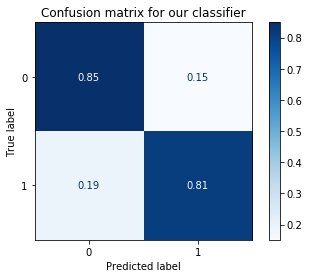

In [20]:
# 8 -confusion matrix
from sklearn.metrics import plot_confusion_matrix

matrix1 = plot_confusion_matrix(model6, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix1)
plt.show()

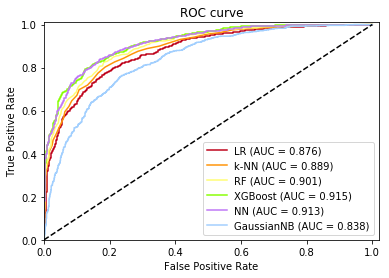

In [21]:
# plot the ROC curves for the two algorithms using matplotlib:


# plot roc curves
plt.plot(fpr1, tpr1,color='#be0119', label='LR (AUC = %0.3f)' % auc_score1)
plt.plot(fpr2, tpr2,color='#ff9408', label='k-NN (AUC = %0.3f)' % auc_score2)
plt.plot(fpr3, tpr3,color='#fffd74', label='RF (AUC = %0.3f)' % auc_score3)
plt.plot(fpr4, tpr4,color='#89fe05', label='XGBoost (AUC = %0.3f)' % auc_score4)
#plt.plot(fpr5, tpr5,color='#069af3', label='EN (AUC = %0.2f)' % auc_score5)
plt.plot(fpr6, tpr6,color='#bf77f6', label='NN (AUC = %0.3f)' % auc_score6)
plt.plot(fpr7, tpr7,color='#a2cffe', label='GaussianNB (AUC = %0.3f)' % auc_score7)
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

# color source: https://xkcd.com/color/rgb/
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.xlim(0,1.02)    # remove the space from the curve to the axes
plt.ylim(0,1.01)
figsize = (15,8)
plt.show()

In [70]:
# print(fpr1,fpr2,fpr3,fpr4,fpr6,fpr7)

In [71]:
# plt.xlim(0,None)

In [72]:
import time
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,auc,roc_curve
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import confusion_matrix, precision_score ,auc, roc_curve
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, neural_network,cluster
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [73]:
MLA = [model1,model2,model3,model4,model6]

In [74]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
model_name=["Logistic Regression","K-Nearest Neighbor","Random Forest","XGBoost","Neural Network"]
row_index = 0

[17:42:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




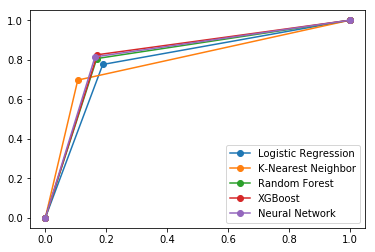

,Model Name,Train Accuracy,Test Accuracy,Precision,AUC,Recall,Time
3,XGBClassifier,0.938663,0.827290,0.825458,0.827271,0.825458,6.288190
4,MLPClassifier,0.843437,0.825859,0.830059,0.825744,0.814851,2.889291
2,RandomForestClassifier,1.000000,0.818702,0.823645,0.818572,0.806172,3.633297
1,KNeighborsClassifier,0.811933,0.796279,0.864833,0.795250,0.697203,0.922490
0,LogisticRegression,0.801671,0.793893,0.800995,0.793710,0.776278,0.108746


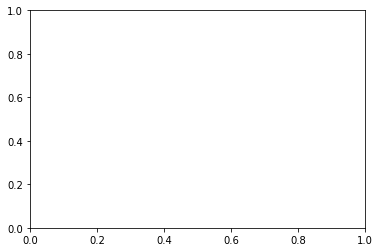

In [75]:
for alg,name in zip(MLA,model_name):
    start = time.time()
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    cost_time=(time.time() - start)
    plt.plot(fp,tp,marker = 'o',label = name)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 6)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 6)
    MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Time'] = cost_time
  
    row_index+=1
plt.legend()
plt.show()
plt.xlim(0,None)
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)

MLA_compare

In [76]:
MLA2 = [model4,model5]
MLA2_columns = []
MLA2_compare = pd.DataFrame(columns = MLA2_columns)
model_name=["XGBoost","Elastic Net"]
row_index = 0

NameError: name 'model5' is not defined

In [18]:
MLA3 = [model5]
MLA3_columns = []
MLA3_compare = pd.DataFrame(columns = MLA3_columns)
model_name=["Elastic Net"]
row_index = 0